In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
diab_df = pd.read_csv('diab_data.csv')

In [44]:
diab_df.head()

,pregno,glu,bp,skin,bmi,ped,age,type
0,6,148,72,35,33.0,0.627,50,Yes
1,1,85,66,29,26.6,0.351,31,No
2,1,89,66,23,28.0,0.167,21,No
3,3,78,50,32,31.0,0.248,26,Yes
4,2,197,70,45,30.5,0.158,53,Yes


In [45]:
diab_df.tail()

,pregno,glu,bp,skin,bmi,ped,age,type
327,2,88,58,26,28.4,0.766,22,No
328,9,170,74,31,44.0,0.403,43,Yes
329,10,101,76,48,32.9,0.171,63,No
330,5,121,72,23,26.2,0.245,30,No
331,1,93,70,31,30.4,0.315,23,No


In [46]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pregno  332 non-null    int64  
 1   glu     332 non-null    int64  
 2   bp      332 non-null    int64  
 3   skin    332 non-null    int64  
 4   bmi     332 non-null    float64
 5   ped     332 non-null    float64
 6   age     332 non-null    int64  
 7   type    332 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 20.9+ KB


In [ ]:
#Predict the is the patient is diabetic or not
#Target_Variable --> type
#Features --> pregno, glu, bp, skin, bmi, ped, age

In [ ]:
#EDA --> Exploratory Data Analysis
#1. Outliers
#2. Missing Values
#3. Categorical Variables
#4. Feature Selection
#5. Scaling
#6. Train Test Split
#7. Model Selection
#8. Model Training
#9. Model Evaluation
#10. Model Deployment

In [ ]:
#count of missing values
diab_df.isnull().sum()

In [ ]:
#statistical summary 
diab_df.describe()

In [47]:
diab_df.columns

Index(['pregno', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age', 'type'], dtype='object')

In [ ]:
diab_df.head(2)

In [48]:
X = diab_df.drop('type', axis=1)
y = diab_df['type']

In [ ]:
#Scaling the data
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X[0:3]

In [49]:

#StandardScaler(applied)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[0:3]





array([[ 0.76709427,  0.94371386,  0.02710369,  0.59972506, -0.03267967,
         0.27185881,  1.75926486],
       [-0.75790752, -1.12490059, -0.44237929, -0.01671061, -0.91275262,
        -0.48903695, -0.02977959],
       [-0.75790752, -0.99355999, -0.44237929, -0.63314627, -0.72023666,
        -0.99630079, -0.97138194]])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(232, 7)
(232,)
(100, 7)
(100,)


In [ ]:
X_train[0:3]

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#k=3
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = knn.predict(X_test)



In [53]:
y_pred[0:10]

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [54]:
y_test[0:10]

25      No
317     No
73      No
193     No
57     Yes
165     No
280    Yes
179    Yes
209     No
195    Yes
Name: type, dtype: object

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.72


In [56]:
knn.score(X_test, y_test)

0.72

In [57]:
knn.score(X_train, y_train)

0.8577586206896551

In [58]:
for i in range(5,22,2):#i=5,7,9,11,13,15,17,19,21
    print("When k =",i)
    knn = KNeighborsClassifier(n_neighbors=i)#k=5,7,9,11,13,15,17,19,21
    knn.fit(X_train, y_train)
    print("Train Score:",knn.score(X_train, y_train))
    print("Test Score:",knn.score(X_test, y_test))
    print('------------------------')


When k = 5
Train Score: 0.8448275862068966
Test Score: 0.68
------------------------
When k = 7
Train Score: 0.8146551724137931
Test Score: 0.71
------------------------
When k = 9
Train Score: 0.8189655172413793
Test Score: 0.73
------------------------
When k = 11
Train Score: 0.8232758620689655
Test Score: 0.72
------------------------
When k = 13
Train Score: 0.8146551724137931
Test Score: 0.72
------------------------
When k = 15
Train Score: 0.8146551724137931
Test Score: 0.69
------------------------
When k = 17
Train Score: 0.7974137931034483
Test Score: 0.72
------------------------
When k = 19
Train Score: 0.8017241379310345
Test Score: 0.69
------------------------
When k = 21
Train Score: 0.8060344827586207
Test Score: 0.7
------------------------


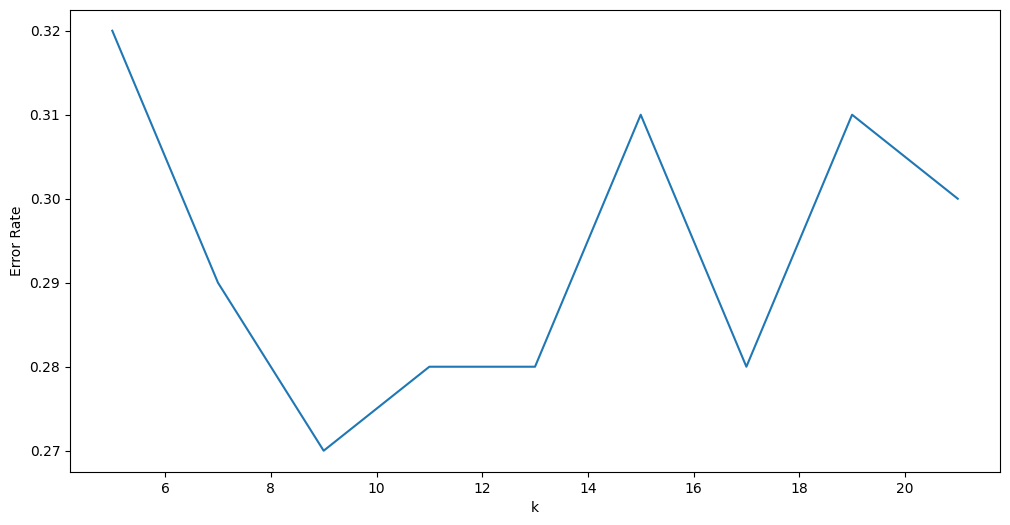

In [60]:
error_rate = []#Track the error rates
for i in range(5,22,2):#i=5,7,9,11,13,15,17,19,21
    knn = KNeighborsClassifier(n_neighbors=i)#k=5,7,9,11,13,15,17,19,21
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(5,22,2),error_rate)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()
    

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)#k=9
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
y_pred = knn.predict(X_test)


In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"% Accuracy")

73.0 % Accuracy


In [64]:
pd.crosstab(y_test,y_pred)

col_0,No,Yes
type,,
No,54,3
Yes,24,19


In [65]:
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,No,Yes
Actual,,
No,54,3
Yes,24,19


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.69      0.95      0.80        57
         Yes       0.86      0.44      0.58        43

    accuracy                           0.73       100
   macro avg       0.78      0.69      0.69       100
weighted avg       0.77      0.73      0.71       100



In [67]:
import pickle

with open("knn_classifier.pkl", "wb") as model_file:
    pickle.dump(knn, model_file)

In [68]:
pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------- -------------------- 4.7/9.9 MB 23.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/25.7 MB 13.1 MB/s eta 0:00:02
   ------ --------------------------------- 4.5/25.7 MB 11.0 MB/s eta 0:00:02
   ----------- ---------------------------- 7.6/25.7 MB 11.8 MB/s eta 0:00:02
   ---------------- ----------------------- 10.5/25.7 MB 12.3 MB/s eta 0:00:02
   ---------------------- ----------------- 14.2/25.7 MB 13.2 MB/s eta 0:00:01
   --------------------------- ------------ 17.6/25.7 MB 13.8 MB/s eta 0:00:01
   --------------------------------- ------ 21.2/25.7 MB 14.1 MB/s eta 0:00:01
   ----------------------------------- ---- 23.1/25.7 MB 13.6 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
